# Cross Lingual Siamese BiLSTM Neural Network with Attention

<p>In this following approaches are performed:
    <li> The preprocessing and tokenization is performed specific to the language English and Spanish </li>
    <li> Word2vec embeddings with respect to each language is generated </li>
    <li> Word2vec STS models - Mean approach is performed. But results are not promising </li>
    <li> Siamese BiLSTM neural network with attention is applied by initializing with two bilstms one with english word2vec embeddings and other with spanish word2vec embeddings </li>
    </p>

## Data Preprocessing

In [2]:
import pandas as pd

In [17]:
train_en_df = pd.read_csv('../data/stsb-en-train.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)

In [46]:
val_en_df = pd.read_csv('../data/stsb-en-dev.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)

In [47]:
test_en_df = pd.read_csv('../data/stsb-en-test.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)

In [18]:
train_en_df.head()

,sent1,sent2,score
0,A plane is taking off.,An air plane is taking off.,5.00
1,A man is playing a large flute.,A man is playing a flute.,3.80
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,3.80
3,Three men are playing chess.,Two men are playing chess.,2.60
4,A man is playing the cello.,A man seated is playing the cello.,4.25


In [19]:
train_es_df = pd.read_csv('../data/stsb-es-train.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)

In [48]:
val_es_df = pd.read_csv('../data/stsb-es-dev.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)

In [49]:
test_es_df = pd.read_csv('../data/stsb-es-test.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)

In [20]:
train_es_df.head()

,sent1,sent2,score
0,Un avión está despegando.,Un avión está despegando.,5.00
1,Un hombre está tocando una gran flauta.,Un hombre está tocando una flauta.,3.80
2,Un hombre está untando queso rallado en una pi...,Un hombre está untando queso rallado en una pi...,3.80
3,Tres hombres están jugando al ajedrez.,Dos hombres están jugando al ajedrez.,2.60
4,Un hombre está tocando el violonchelo.,Un hombre sentado está tocando el violonchelo.,4.25


In [21]:
train_es_df['sent1_trans'] = train_en_df['sent1']

In [50]:
val_es_df['sent1_trans'] = val_en_df['sent1']

In [51]:
test_es_df['sent1_trans'] = test_en_df['sent1']

In [22]:
train_es_df.head()

,sent1,sent2,score,sent1_trans
0,Un avión está despegando.,Un avión está despegando.,5.00,A plane is taking off.
1,Un hombre está tocando una gran flauta.,Un hombre está tocando una flauta.,3.80,A man is playing a large flute.
2,Un hombre está untando queso rallado en una pi...,Un hombre está untando queso rallado en una pi...,3.80,A man is spreading shreded cheese on a pizza.
3,Tres hombres están jugando al ajedrez.,Dos hombres están jugando al ajedrez.,2.60,Three men are playing chess.
4,Un hombre está tocando el violonchelo.,Un hombre sentado está tocando el violonchelo.,4.25,A man is playing the cello.


In [735]:
train_es_df[10:20]

,sent1,sent2,score,sent1_trans
10,El hombre golpeó al otro hombre con un palo.,El hombre golpeó al otro hombre con un palo.,4.200,The man hit the other man with a stick.
11,Una mujer recoge y sostiene un bebé canguro.,Una mujer coge y sostiene un bebé canguro en s...,4.600,A woman picks up and holds a baby kangaroo.
12,Un hombre está tocando una flauta.,Un hombre está tocando una flauta de bambú.,3.867,A man is playing a flute.
13,Una persona está doblando un pedazo de papel.,Alguien está doblando un pedazo de papel.,4.667,A person is folding a piece of paper.
14,Un hombre está corriendo en la carretera.,Un perro panda está corriendo en la carretera.,1.667,A man is running on the road.
15,Un perro está tratando de quitarse el tocino d...,Un perro está tratando de comerse el tocino de...,3.750,A dog is trying to get bacon off his back.
16,El oso polar se está deslizando en la nieve.,Un oso polar se está deslizando por la nieve.,5.000,The polar bear is sliding on the snow.
17,Una mujer está escribiendo.,Una mujer está nadando.,0.500,A woman is writing.
18,Un gato se está frotando contra la cara del bebé.,Un gato se está frotando contra un bebé.,3.800,A cat is rubbing against baby's face.
19,El hombre está montando a caballo.,Un hombre está montando a caballo.,5.000,The man is riding a horse.


In [33]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/AH00434/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/AH00434/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
#words = nltk.word_tokenize(text, language='spanish')

In [27]:
lemmatizer = WordNetLemmatizer()

In [28]:
stop_words_es = set(stopwords.words('spanish'))

In [30]:
stop_words = set(stopwords.words('english'))

In [29]:
def preprocess_text_es(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Replace numbers with num
    text = re.sub(r'\d+', '', text)
    # Lower case
    text= text.lower()
    #sent_token = text.split()
    sent_token = nltk.word_tokenize(text, language='spanish')
    #stop words removal
    sent_token = [word for word in sent_token if word.lower() not in stop_words_es]
    # Lemmatize
    sent_token = [lemmatizer.lemmatize(word) for word in sent_token]
    # Stemming
    #sent_token = [ps.stem(word) for word in sent_token]
    return sent_token

In [31]:
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Replace numbers with num
    text = re.sub(r'\d+', '', text)
    # Lower case
    text= text.lower()
    #sent_token = text.split()
    sent_token = nltk.word_tokenize(text, language='english')
    #stop words removal
    sent_token = [word for word in sent_token if word.lower() not in stop_words]
    # Lemmatize
    sent_token = [lemmatizer.lemmatize(word) for word in sent_token]
    # Stemming
    #sent_token = [ps.stem(word) for word in sent_token]
    return sent_token

In [34]:
train_df['sent1'] = train_en_df['sent1'].apply(lambda x: preprocess_text(x))
train_df['sent2'] = train_es_df['sent2'].apply(lambda x: preprocess_text_es(x))

In [35]:
train_df.head()

,sent1,sent2,score
0,"[plane, taking]","[avión, despegando]",5.00
1,"[man, playing, large, flute]","[hombre, tocando, flauta]",3.80
2,"[man, spreading, shreded, cheese, pizza]","[hombre, untando, queso, rallado, pizza, cruda]",3.80
3,"[three, men, playing, chess]","[do, hombre, jugando, ajedrez]",2.60
4,"[man, playing, cello]","[hombre, sentado, tocando, violonchelo]",4.25


In [36]:
en_sents = list(train_df['sent1'])
es_sents = list(train_df['sent2'])

In [37]:
word_en_dict = {}
for word_tokens in en_sents:
    for word in word_tokens:
        if word in word_en_dict:
            word_en_dict[word] += 1
        else:
            word_en_dict[word] = 1

In [38]:
word_es_dict = {}
for word_tokens in es_sents:
    for word in word_tokens:
        if word in word_es_dict:
            word_es_dict[word] += 1
        else:
            word_es_dict[word] = 1

In [41]:
len(word_es_dict)

9823

In [42]:
len(word_en_dict)

8079

In [43]:
sent_dict = {}
for sent in es_sents:
    if len(sent) in sent_dict:
        sent_dict[len(sent)] += 1
    else:
        sent_dict[len(sent)] = 1

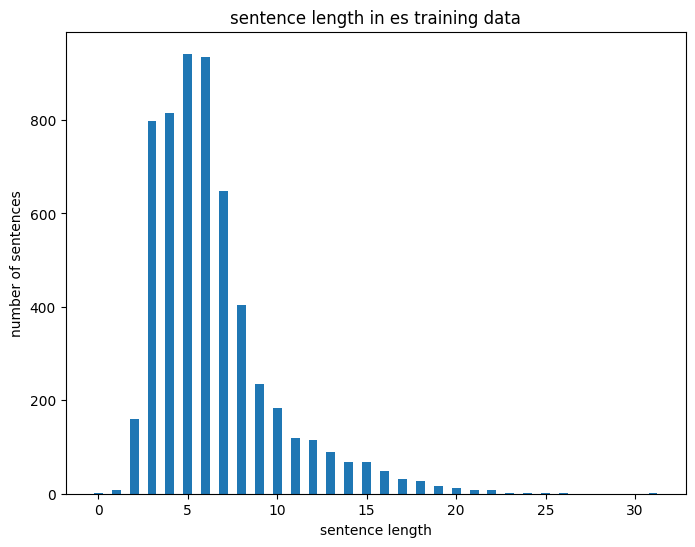

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(list(sent_dict.keys()), list(sent_dict.values()), width=0.5)
plt.title("sentence length in es training data")
plt.xlabel("sentence length")
plt.ylabel("number of sentences")
plt.show()

In [53]:
val_df = val_en_df.copy(deep=False)

In [57]:
val_df['sent1'] = val_en_df['sent1'].apply(lambda x: preprocess_text(x))
val_df['sent2'] = val_es_df['sent2'].apply(lambda x: preprocess_text_es(x))

In [58]:
val_df.head()

,sent1,sent2,score
0,"[man, hard, hat, dancing]","[hombre, casco, bailando]",5.00
1,"[young, child, riding, horse]","[niño, montando, caballo]",4.75
2,"[man, feeding, mouse, snake]","[hombre, alimentando, serpiente, ratón]",5.00
3,"[woman, playing, guitar]","[hombre, tocando, guitarra]",2.40
4,"[woman, playing, flute]","[hombre, tocando, flauta]",2.75


In [60]:
test_df = test_en_df.copy(deep=False)

In [61]:
test_en_df.head()

,sent1,sent2,score
0,A girl is styling her hair.,A girl is brushing her hair.,2.5
1,A group of men play soccer on the beach.,A group of boys are playing soccer on the beach.,3.6
2,One woman is measuring another woman's ankle.,A woman measures another woman's ankle.,5.0
3,A man is cutting up a cucumber.,A man is slicing a cucumber.,4.2
4,A man is playing a harp.,A man is playing a keyboard.,1.5


In [62]:
test_df['sent1'] = test_en_df['sent1'].apply(lambda x: preprocess_text(x))
test_df['sent2'] = test_es_df['sent2'].apply(lambda x: preprocess_text_es(x))

In [63]:
test_df.head()

,sent1,sent2,score
0,"[girl, styling, hair]","[chica, cepillando, pelo]",2.5
1,"[group, men, play, soccer, beach]","[grupo, chico, jugando, fútbol, playa]",3.6
2,"[one, woman, measuring, another, woman, ankle]","[mujer, mide, tobillo, mujer]",5.0
3,"[man, cutting, cucumber]","[hombre, cortando, pepino]",4.2
4,"[man, playing, harp]","[hombre, tocando, teclado]",1.5


In [64]:
train_df.to_csv("../data/cleaned_cross_train_df1.csv", index=False)  
val_df.to_csv("../data/cleaned_cross_val_df1.csv", index=False)  
test_df.to_csv("../data/cleaned_cross_test_df1.csv", index=False)  

In [65]:
import pickle
with open('../data/word_dict_cross_en_v1.pickle', 'wb') as handle:
    pickle.dump(word_en_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [66]:
with open('../data/word_dict_cross_es_v1.pickle', 'wb') as handle:
    pickle.dump(word_es_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Word2vec-STS

<p> Pretrained word2vec embeddings for english and spanish are used to generated vector embeddings for each word. These embeddings are averaged and concatenated fed to BiLSTM Regresssion model for similarity score generation <p>

In [110]:
import numpy as np
import torch
import torch.nn as nn
from gensim.models import KeyedVectors
import torch.nn as nn
import torch.optim as optim

In [84]:
es_model = KeyedVectors.load_word2vec_format("../data/SBW-vectors-300-min5.bin", binary=True)

In [92]:
en_model = KeyedVectors.load_word2vec_format("../data/GoogleNews-vectors-negative300.bin", binary=True)

In [234]:
# define a function to generate sentence embeddings
def get_sentence_embedding_es(sentence, max_length=30):
    # split sentence into words
    #words = sentence.split()
    words = sentence
    unk_token = "unk"
    # filter out words that are not present in the model's vocabulary
    words = [word if word in es_model.key_to_index else unk_token for word in words ]
    if len(words)==0:
        words = ["unk"]
    # generate word embeddings for each word
    embeddings = [es_model[word] for word in words]
    # pad embeddings with zeros if the sentence is shorter than max_length
    embedding = np.mean(embeddings, axis=0)
    return embedding

In [235]:
# define a function to generate sentence embeddings
def get_sentence_embedding_en(sentence, max_length=30):
    # split sentence into words
    #words = sentence.split()
    words = sentence
    unk_token = "unk"
    # filter out words that are not present in the model's vocabulary
    words = [word if word in en_model.key_to_index else unk_token for word in words ]
    if len(words)==0:
        words = ["unk"]
    # generate word embeddings for each word
    embeddings = [en_model[word] for word in words]
    # pad embeddings with zeros if the sentence is shorter than max_length
    embedding = np.mean(embeddings, axis=0)
    return embedding

In [236]:
train_sentences1 = list(train_df['sent1'])
train_sentences2 = list(train_df['sent2'])
train_similarity_scores = list(train_df['score'])

In [237]:
train_X1 = np.array([get_sentence_embedding_en(sentence) for sentence in train_sentences1])

In [238]:
train_X2 = np.array([get_sentence_embedding_es(sentence) for sentence in train_sentences2])

In [259]:
val_sentences1 = list(val_df['sent1'])
val_sentences2 = list(val_df['sent2'])
val_similarity_scores = list(val_df['score'])

In [260]:
val_X1 = np.array([get_sentence_embedding_en(sentence) for sentence in val_sentences1])
val_X2 = np.array([get_sentence_embedding_es(sentence) for sentence in val_sentences2])

In [244]:
import torch.utils.data as data

# Define a custom dataset class
class SentenceSimilarityDataset(data.Dataset):
    def __init__(self, embeddings1, embeddings2, scores):
        self.embeddings1 = embeddings1
        self.embeddings2 = embeddings2
        self.scores = scores

    def __len__(self):
        return max(len(self.embeddings1),len(self.embeddings2))

    def __getitem__(self, index):
        return torch.tensor(self.embeddings1[index]), torch.tensor(self.embeddings2[index]), torch.tensor(self.scores[index], dtype=torch.float)
        #return torch.tensor(self.embeddings1[index]), torch.tensor(self.scores[index], dtype=torch.float)

In [261]:
train_dataset = SentenceSimilarityDataset(train_X1, train_X2, train_similarity_scores)

In [262]:
train_dataloader = data.DataLoader(train_dataset, batch_size=10, shuffle=True)

In [264]:
val_dataset = SentenceSimilarityDataset(val_X1, val_X2, val_similarity_scores)

In [265]:
val_dataloader = data.DataLoader(val_dataset, batch_size=10, shuffle=True)

In [316]:
# class BiLSTMRegression(nn.Module):
#     def __init__(self, input_dim, hidden_dim, num_layers):
#         super().__init__()
#         self.input_dim = input_dim
#         self.hidden_dim = hidden_dim
#         self.num_layers = num_layers
#         self.bilstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, batch_first=True, bidirectional=True)
#         self.fc = nn.Linear(hidden_dim*2, 1)

#     def forward(self, x1, x2):
#         x = torch.cat((x1, x2), dim=1)
#         x = x.view(len(x), 1, -1)
#         h0 = torch.zeros(self.num_layers*2, len(x), self.hidden_dim).to(x.device)
#         c0 = torch.zeros(self.num_layers*2, len(x), self.hidden_dim).to(x.device)
#         out, _ = self.bilstm(x, (h0, c0))
#         out = self.fc(out[:, -1, :])
#         return out
    
class BiLSTMRegression(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, dropout_prob):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout_prob = dropout_prob
        self.bilstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_dim*2, 1)

    def forward(self, x1, x2):
        x = torch.cat((x1, x2), dim=1)
        x = x.view(len(x), 1, -1)
        h0 = torch.zeros(self.num_layers*2, len(x), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers*2, len(x), self.hidden_dim).to(x.device)
        out, _ = self.bilstm(x, (h0, c0))
        out = self.dropout(out) # Apply dropout
        out = self.fc(out[:, -1, :])
        return out

    

class GRURegression(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim*2, 1)

    def forward(self, x1, x2):
        x = torch.cat((x1, x2), dim=1)
        x = x.view(len(x), 1, -1)
        h0 = torch.zeros(self.num_layers*2, len(x), self.hidden_dim).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        return out


class BiLSTMAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, attention_dim):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.attention_dim = attention_dim
        self.bilstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.attention = SelfAttention(hidden_dim*2, attention_dim, 1)
        #self.attention = nn.Linear(hidden_dim*2, attention_dim)
        #self.softmax = nn.Softmax(dim=1)
        self.fc = nn.Linear(hidden_dim*2, 1)

    def forward(self, x1, x2):
        x = torch.cat((x1, x2), dim=1)
        x = x.view(len(x), 1, -1)
        h0 = torch.zeros(self.num_layers*2, len(x), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers*2, len(x), self.hidden_dim).to(x.device)
        out, _ = self.bilstm(x, (h0, c0))
        #att_weights = self.softmax(self.attention(out))
        att_weights = self.attention(out)
        out = torch.sum(out * att_weights, dim=1)
        out = self.fc(out)
        return out

class SelfAttention(nn.Module):
    """
    Implementation of the attention block
    """

    def __init__(self, input_size, hidden_size, output_size):
        super(SelfAttention, self).__init__()
        # TODO implement

        # constructing linear layers with weights analogous to Ws1 and Ws2
        self.layer1 = nn.Linear(input_size, hidden_size, bias=False)
        self.layer2 = nn.Linear(hidden_size, output_size, bias=False)
        self.softmax = nn.Softmax(dim=1)

    ## the forward function would receive lstm's all hidden states as input
    def forward(self, attention_input):
        # TODO implement

        # implementing the attention mechanism
        output = self.layer1(attention_input)
        output = torch.tanh(output)
        output = self.layer2(output)
        #output = F.softmax(output.transpose(1,2), dim=2)
        output = self.softmax(output)

        return output

In [317]:
# Define the hyperparameters
input_dim = 300 # The dimension of the sentence embeddings
hidden_dim = 150
lr = 0.001
num_epochs = 15
#batch_size = 10

In [318]:
#model = GRURegression(input_dim*2, hidden_dim, num_layers=2)
model = BiLSTMRegression(input_dim*2, hidden_dim, num_layers=2, dropout_prob = 0.3)
#model = BiLSTMAttention(input_dim*2, hidden_dim, num_layers=2, attention_dim=600)

In [319]:
import torch
from scipy.stats import pearsonr

class PearsonLoss(nn.Module):
    def __init__(self):
        super(PearsonLoss, self).__init__()
        
    def forward(self, pred, target):
        pred = pred.view(-1)
        target = target.view(-1)
        pearson_r, _ = pearsonr(pred.detach().cpu().numpy(), target.detach().cpu().numpy())
        loss = 1 - pearson_r
        return torch.tensor(loss, requires_grad=True, device=pred.device)


In [320]:
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)

# Define the loss function
#loss_fn = nn.MSELoss()
loss_fn = PearsonLoss()

In [321]:
def train(model, optimizer, num_epochs, train_dataloader):
    train_losses = []
    val_losses = []
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for embeddings1_batch, embeddings2_batch, scores_batch in train_dataloader:
            optimizer.zero_grad()
            output = model(embeddings1_batch, embeddings2_batch)
            loss = loss_fn(output.squeeze(), scores_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * len(embeddings1_batch)
        train_loss /= len(train_dataloader)
        train_losses.append(train_loss)

    # Evaluate the model on the validation set
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for val_embeddings1_batch, val_embeddings2_batch, val_scores_batch in val_dataloader:
                val_output = model(val_embeddings1_batch, val_embeddings2_batch)
                val_loss += loss_fn(val_output.squeeze(), val_scores_batch).item() * len(val_embeddings1_batch)
            val_loss /= len(val_dataloader)
            val_losses.append(val_loss)

        print('Epoch {} - Training Loss: {:.4f}, Validation Loss: {:.4f}'.format(epoch+1, train_loss, val_loss))
    return train_losses, val_losses

In [322]:
train_losses, val_losses = train(model, optimizer, num_epochs, train_dataloader)

Epoch 1 - Training Loss: 9.7208, Validation Loss: 9.6175
Epoch 2 - Training Loss: 9.7487, Validation Loss: 9.6562
Epoch 3 - Training Loss: 9.8712, Validation Loss: 9.8164
Epoch 4 - Training Loss: 9.8837, Validation Loss: 9.4729
Epoch 5 - Training Loss: 9.6155, Validation Loss: 9.6676
Epoch 6 - Training Loss: 9.6144, Validation Loss: 9.7780
Epoch 7 - Training Loss: 9.8278, Validation Loss: 9.9708
Epoch 8 - Training Loss: 9.7361, Validation Loss: 9.6792
Epoch 9 - Training Loss: 9.7499, Validation Loss: 9.6764
Epoch 10 - Training Loss: 10.0480, Validation Loss: 9.6591
Epoch 11 - Training Loss: 9.6885, Validation Loss: 9.5048
Epoch 12 - Training Loss: 9.7946, Validation Loss: 9.8069
Epoch 13 - Training Loss: 9.9145, Validation Loss: 9.5931
Epoch 14 - Training Loss: 9.8349, Validation Loss: 9.6208
Epoch 15 - Training Loss: 9.7345, Validation Loss: 9.8524


In [323]:
def evaluate(model, data_loader):
    y_pred_test = []
    model.eval()
    with torch.no_grad():
        for emb1, emb2, scores in data_loader:
            test_output = model(emb1, emb2)
            y_pred_test.extend(test_output.squeeze().tolist())
    return y_pred_test

In [324]:
y_pred = evaluate(model, train_dataloader)
#corr = pearson_corr(train_similarity_scores, y_pred)
#print("Pearson correlation coefficient: {:.2f}".format(corr))

In [310]:
from scipy.stats import pearsonr
def pearson_corr(y_true, y_pred):
    """
    Calculate Pearson correlation coefficient between two arrays.
    """
    corr, _ = pearsonr(y_true, y_pred)
    return corr

In [325]:
corr = pearson_corr(train_similarity_scores, y_pred)
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: -0.00


In [326]:
y_pred = evaluate(model, val_dataloader)

In [327]:
corr = pearson_corr(val_similarity_scores, y_pred)
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.03


In [728]:
#y_pred = evaluate(model, test_dataloader)

In [ ]:
corr = pearson_corr(test_similarity_scores, y_pred)
print("Pearson correlation coefficient: {:.2f}".format(corr))

# Siamese BiLstm with Attention

In [329]:
embedding_matrix_en = en_model.vectors

In [330]:
embedding_matrix_es = es_model.vectors

In [335]:
word2idx_en = {word: i for i, word in enumerate(en_model.index_to_key)}

In [336]:
word2idx_es = {word: i for i, word in enumerate(es_model.index_to_key)}

In [331]:
with open('../data/word_dict_cross_en_v1.pickle', 'rb') as f:
    vocab_en = pickle.load(f)

In [332]:
with open('../data/word_dict_cross_es_v1.pickle', 'rb') as f:
    vocab_es = pickle.load(f)

In [333]:
vocab_list_en = list(vocab_en.keys())
vocab_list_es = list(vocab_es.keys())

In [334]:
vocab_list_en.append("unk")
vocab_list_es.append("unk")

In [337]:
vocab_list_en = [i for i in vocab_list_en if i in word2idx_en]
vocab_list_es = [i for i in vocab_list_es if i in word2idx_es]

In [338]:
vocab_dict_en = {k:i for i,k in enumerate(vocab_list_en)}
vocab_dict_es = {k:i for i,k in enumerate(vocab_list_es)}

In [339]:
word2idx_trunc_en = {}
for i in list(vocab_dict_en.keys()):
  word2idx_trunc_en[vocab_dict_en[i]] = word2idx_en[i]

In [340]:
word2idx_trunc_es = {}
for i in list(vocab_dict_es.keys()):
  word2idx_trunc_es[vocab_dict_es[i]] = word2idx_es[i]

In [341]:
word_indexes_en = list(word2idx_trunc_en.values())
word_indexes_es = list(word2idx_trunc_es.values())

In [342]:
subset_embedding_matrix_en = en_model.vectors[word_indexes_en]
subset_embedding_matrix_es = es_model.vectors[word_indexes_es]

In [343]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence

class MyDataset(Dataset):
    def __init__(self, sentences1, sentences2, scores, word_to_ix_en, word_to_ix_es ):
        self.sentences1 = sentences1
        self.sentences2 = sentences2
        self.scores = scores
        self.word_to_ix_en = word_to_ix_en
        self.word_to_ix_es = word_to_ix_es

    def __len__(self):
        return max(len(self.sentences1),len(self.sentences2))

    def __getitem__(self, idx):
        unk_token1 = self.word_to_ix_en['unk']
        unk_token2 = self.word_to_ix_es['unk']
        sentence1 = self.sentences1[idx]
        sentence2 = self.sentences2[idx]
        score = self.scores[idx]
        seq1 = [self.word_to_ix_en[word] if word in self.word_to_ix_en else unk_token1 for word in sentence1]
        seq2 = [self.word_to_ix_es[word] if word in self.word_to_ix_es else unk_token2 for word in sentence2]
        #seq1 = [self.word_to_ix[word] for word in sentence1 if word in self.word_to_ix]
        #seq2 = [self.word_to_ix[word] for word in sentence2 if word in self.word_to_ix]
        return seq1, seq2, score

    def collate_fn(self, batch):
        sequences1, sequences2, scores = zip(*batch)
        padded_seqs1 = pad_sequence([torch.LongTensor(seq) for seq in sequences1], batch_first=True, padding_value=0)
        padded_seqs2 = pad_sequence([torch.LongTensor(seq) for seq in sequences2], batch_first=True, padding_value=0)
        #return padded_seqs1, padded_seqs2, torch.tensor(scores, dtype=torch.float)
        return padded_seqs1, padded_seqs2, torch.LongTensor(scores)

In [344]:
sent1_tokens = list(train_df['sent1'])
sent2_tokens = list(train_df['sent2'])
scores = list(train_df['score'])

In [345]:
word_to_ix_en = vocab_dict_en
word_to_ix_es = vocab_dict_es
train_dataset = MyDataset(sent1_tokens, sent2_tokens, scores, word_to_ix_en, word_to_ix_es )
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=train_dataset.collate_fn)

In [346]:
val_sent1_tokens = list(val_df['sent1'])
val_sent2_tokens = list(val_df['sent2'])
val_scores = list(val_df['score'])

In [347]:
val_dataset = MyDataset(val_sent1_tokens, val_sent2_tokens, val_scores, word_to_ix_en, word_to_ix_es)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=True, collate_fn=val_dataset.collate_fn)

In [348]:
test_sent1_tokens = list(test_df['sent1'])
test_sent2_tokens = list(test_df['sent2'])
test_scores = list(test_df['score'])

In [349]:
test_dataset = MyDataset(test_sent1_tokens, test_sent2_tokens, test_scores, word_to_ix_en, word_to_ix_es)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True, collate_fn=test_dataset.collate_fn)

In [350]:
len(subset_embedding_matrix_en), len(subset_embedding_matrix_es)

(6967, 8786)

In [451]:
import torch
import torch.nn as nn


class SiameseBiLSTM(nn.Module):
    def __init__(self, hidden_size, num_layers, embedding_dim, embd_matrix1, embd_matrix2, dropout=0.2):
        super(SiameseBiLSTM, self).__init__()

        # LSTM parameters
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding_dim = embedding_dim
        self.embd_matrix1 = embd_matrix1
        self.embd_matrix2 = embd_matrix2

        # Word embeddings
        self.word_embeddings1 = nn.Embedding(len(self.embd_matrix1), embedding_dim)
        self.word_embeddings1.weight = nn.Parameter(torch.from_numpy(self.embd_matrix1))
        self.word_embeddings1.weight.requires_grad = False
        
        self.word_embeddings2 = nn.Embedding(len(self.embd_matrix2), embedding_dim)
        self.word_embeddings2.weight = nn.Parameter(torch.from_numpy(self.embd_matrix2))
        self.word_embeddings2.weight.requires_grad = False

        # BiLSTM layers
        self.bilstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size, num_layers=num_layers,
                              batch_first=True, bidirectional=True)

        # Dropout layer
        self.dropout = nn.Dropout(dropout)

        # Attention layers
        self.attention_fc = nn.Linear(hidden_size * 2, 1)
        self.attention_softmax = nn.Softmax(dim=1)

        # Similarity scoring layer
        self.fc = nn.Linear(hidden_size * 4, 1)  # 4 because we concatenate forward and backward hidden states of both LSTMs

    def forward_once_en(self, sentence):
        # Word embeddings
        embeds = self.word_embeddings1(sentence)

        # BiLSTM
        lstm_out, _ = self.bilstm(embeds)

        # Apply dropout to hidden layers
        lstm_out = self.dropout(lstm_out)

        # Attention mechanism
        attention_weights = self.attention_softmax(self.attention_fc(lstm_out))
        lstm_out = lstm_out * attention_weights
        lstm_out = lstm_out.sum(dim=1)

        return lstm_out
    
    def forward_once_es(self, sentence):
        # Word embeddings
        embeds = self.word_embeddings2(sentence)

        # BiLSTM
        lstm_out, _ = self.bilstm(embeds)

        # Apply dropout to hidden layers
        lstm_out = self.dropout(lstm_out)

        # Attention mechanism
        attention_weights = self.attention_softmax(self.attention_fc(lstm_out))
        lstm_out = lstm_out * attention_weights
        lstm_out = lstm_out.sum(dim=1)

        return lstm_out

    def forward(self, sentence1, sentence2):
        # Process sentence 1
        output1 = self.forward_once_en(sentence1)

        # Process sentence 2
        output2 = self.forward_once_es(sentence2)

        # Concatenate outputs of both LSTMs
        concatenated = torch.cat((output1, output2), dim=1)

        # Pass through similarity scoring layer
        similarity_score = torch.sigmoid(self.fc(concatenated))

        return similarity_score


In [452]:
# Define model and optimizer
model = SiameseBiLSTM(hidden_size=150, num_layers=2, embedding_dim=300, embd_matrix1 = subset_embedding_matrix_en, embd_matrix2 = subset_embedding_matrix_es)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Define loss function
#criterion = nn.MSELoss()
criterion = PearsonLoss()

num_epochs = 10

# Train model
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for i, (sentence1, sentence2, score) in enumerate(train_dataloader):
        # Convert inputs and output to PyTorch tensors
        sentence1_tensor = sentence1
        sentence2_tensor = sentence2
        score_tensor = torch.tensor(score, dtype=torch.float)/5.0
        
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        output = model(sentence1_tensor, sentence2_tensor)
        
        #print(score_tensor.squeeze().shape)
        # Compute loss
        #loss = criterion(outputs, score_tensor.unsqueeze(-1))
        loss = criterion(output.squeeze(), score_tensor.squeeze())
        #loss = model.loss(output, score_tensor.unsqueeze(-1))
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        epoch_loss += loss.item()  # add batch loss to total epoch loss
        
     # Validation loop
    model.eval()  # set model to evaluation mode
    total_val_loss = 0
    with torch.no_grad():
        for j, (val_sentence1, val_sentence2, val_score) in enumerate(val_dataloader):
            val_sentence1_tensor = val_sentence1
            val_sentence2_tensor = val_sentence2
            val_score_tensor = torch.tensor(val_score, dtype=torch.float)/5.0
            outputs = model(val_sentence1_tensor, val_sentence2_tensor)
            #val_loss = criterion(outputs, val_score_tensor.unsqueeze(-1))
            val_loss = criterion(outputs.squeeze(), val_score_tensor.squeeze())
            #val_loss = model.loss(outputs, val_score_tensor.unsqueeze(-1))
            total_val_loss += val_loss.item()
            
    avg_train_loss = epoch_loss / len(train_dataloader) 
    avg_val_loss = total_val_loss / len(val_dataloader)
    print('Epoch [{}/{}], Train Loss: {:.4f}, Val Loss: {:.4f}'.format(epoch+1, num_epochs, avg_train_loss, avg_val_loss))

/var/folders/gb/8lc9v2sx5mq19kgysgv67bzw0000gn/T/ipykernel_66582/2886958499.py:33: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  return padded_seqs1, padded_seqs2, torch.LongTensor(scores)
/var/folders/gb/8lc9v2sx5mq19kgysgv67bzw0000gn/T/ipykernel_66582/1260678673.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  score_tensor = torch.tensor(score, dtype=torch.float)/5.0
/var/folders/gb/8lc9v2sx5mq19kgysgv67bzw0000gn/T/ipykernel_66582/1260678673.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_score_tensor = torch.tensor(val_score, dtype=torch.float)/

Epoch [1/10], Train Loss: 1.1450, Val Loss: 1.0735
Epoch [2/10], Train Loss: 1.1797, Val Loss: 1.0836
Epoch [3/10], Train Loss: 1.1853, Val Loss: 1.0822
Epoch [4/10], Train Loss: 1.1765, Val Loss: 1.0781
Epoch [5/10], Train Loss: 1.1836, Val Loss: 1.0598
Epoch [6/10], Train Loss: 1.1705, Val Loss: 1.0681
Epoch [7/10], Train Loss: 1.1847, Val Loss: 1.0850
Epoch [8/10], Train Loss: 1.1824, Val Loss: 1.0770
Epoch [9/10], Train Loss: 1.1747, Val Loss: 1.0719
Epoch [10/10], Train Loss: 1.1743, Val Loss: 1.0704


## Hyperparameter tuning using Bayesian optimization

In [699]:
def train(model, iterator, optimizer, criterion):
    epoch_loss = 0
    predictions_lt = []
    labels_lt = []
    for i, (sentence1, sentence2, score) in enumerate(iterator):
        sentence1_tensor = sentence1
        sentence2_tensor = sentence2
        score_tensor = torch.tensor(score, dtype=torch.float)/5.0
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        output = model(sentence1_tensor, sentence2_tensor)
        y_pred = output.detach().tolist()
        loss = criterion(output.squeeze(), score_tensor.squeeze())
        y_true = score.tolist()
        #print(len(y_pred), len(y_true))
        predictions_lt.extend(y_pred)
        labels_lt.extend(y_true)
        
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    labels = np.array(labels_lt)
    predictions = np.array(predictions_lt)
    corr = pearson_corr(labels, predictions.ravel())
    #print("corr is ", corr)
    
    return epoch_loss / len(iterator), corr
                         
    

In [700]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    predictions_lt = []
    labels_lt = []
    
    model.eval()
    
    with torch.no_grad():
        for i, (sentence1, sentence2, score) in enumerate(iterator):
            sentence1_tensor = sentence1
            sentence2_tensor = sentence2
            score_tensor = torch.tensor(score, dtype=torch.float)/5.0

            # Forward pass
            output = model(sentence1_tensor, sentence2_tensor)
            y_pred = output.detach().tolist()
            y_true = score.tolist()
            predictions_lt.extend(y_pred)
            labels_lt.extend(y_true)
            
        
            epoch_loss += loss.item()
        
        labels = np.array(labels_lt)
        predictions = np.array(predictions_lt)
        corr = pearson_corr(labels, predictions.ravel())
    
    return epoch_loss / len(iterator), corr
                         
    

In [707]:
def get_data_iterators(BATCH_SIZE=16):
    train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=train_dataset.collate_fn)
    val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=val_dataset.collate_fn)
    test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=test_dataset.collate_fn)
    
    return train_dataloader, val_dataloader, test_dataloader
    

In [719]:
def tune_model(N_LAYERS, HIDDEN_DIM, DROPOUT, BATCH_SIZE, optim_type, N_EPOCHS, lr):
    #print("params are", HIDDEN_DIM, DROPOUT, BATCH_SIZE, optim_type, N_EPOCHS, lr)
    #N_LAYERS = 2
    HIDDEN_DIM = HIDDEN_DIM
    N_LAYERS = int(N_LAYERS)
    BATCH_SIZE = int(BATCH_SIZE)
    N_EPOCHS = int(N_EPOCHS)
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    train_iterator, valid_iterator, test_iterator = get_data_iterators(BATCH_SIZE)
    
    
    model = SiameseBiLSTM(hidden_size=150, num_layers=2, embedding_dim=300, embd_matrix1 = subset_embedding_matrix_en, embd_matrix2 = subset_embedding_matrix_es, dropout = DROPOUT)
    
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax']
    optimizerD= {'Adam':optim.Adam(model.parameters(), lr=lr), 'SGD':optim.SGD(model.parameters(), lr=lr),
                 'RMSprop':optim.RMSprop(model.parameters(), lr=lr), 'Adadelta':optim.Adadelta(model.parameters(), lr=lr),
                 'Adagrad':optim.Adagrad(model.parameters(), lr=lr), 'Adamax':optim.Adamax(model.parameters(), lr=lr)
                 }
    
    optimizer = optimizerD[optimizerL[round(optim_type)]]
    #optimizer = optim.Adam(model.parameters(), lr = lr)
    
    
    
    criterion = nn.MSELoss()

    #model = model.to(device)
    #criterion = criterion.to(device)
    
    for epoch in range(N_EPOCHS):

    
        train_loss, train_corr = train(model, train_iterator, optimizer, criterion)
        valid_loss, val_corr = evaluate(model, valid_iterator, criterion)
        test_loss, test_corr = evaluate(model, test_iterator, criterion)

        #print("the valid acc is ",valid_acc)
    

        best_valid_loss = float('inf')
        best_valid_corr = 0
    
#         if valid_loss < best_valid_loss:
#             best_valid_loss = valid_loss
        #     best_valid_acc = valid_acc
        if best_valid_corr < val_corr:
            best_valid_corr = val_corr
#             #torch.save(model.state_dict(), 'tut2-model.pt')
#             torch.save(model, "cross_sts_model_v1.pt")
    

#         print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
#         print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
#         print(f'\t Test. Loss: {test_loss:.3f} |  Test. Acc: {test_acc*100:.2f}%')
        
        print(f'\tTrain Loss: {train_loss:.3f}| Train Corr:{train_corr:.3f}| Val. Loss: {valid_loss:.3f}| Val Corr:{val_corr:.3f} | Test. Loss: {test_loss:.3f}| Test Corr:{test_corr:.3f}')
#         print(f'\t Val. Loss: {valid_loss:.3f}| Val Corr:{val_corr:.3f}')
#         print(f'\t Test. Loss: {test_loss:.3f}| Test Corr:{test_corr:.3f}')
    
    
#     print("the best valid corr is ", best_valid_corr)
    return best_valid_corr

    
    
    

In [720]:
from bayes_opt import BayesianOptimization

In [721]:
params_nn = {
    'N_LAYERS': (1,3),
    'HIDDEN_DIM':(50, 500),
    'DROPOUT':(0,1),
    'BATCH_SIZE':(10, 32),
    'optim_type':(0,5),
    'N_EPOCHS':(1, 10),
    'lr':(0.001, 1)
    
}

In [722]:
import warnings
warnings.filterwarnings('ignore')

In [723]:
nn_bo = BayesianOptimization(tune_model, params_nn, random_state=111)

In [724]:
nn_bo.maximize(init_points=2, n_iter=50)

|   iter    |  target   | BATCH_... |  DROPOUT  | HIDDEN... | N_EPOCHS  | N_LAYERS  |    lr     | optim_... |
-------------------------------------------------------------------------------------------------------------
	Train Loss: 0.084| Train Corr:0.151| Val. Loss: 1.622| Val Corr:0.019 | Test. Loss: 1.622| Test Corr:0.018
	Train Loss: 0.083| Train Corr:0.168| Val. Loss: 1.622| Val Corr:0.027 | Test. Loss: 1.622| Test Corr:0.028
	Train Loss: 0.083| Train Corr:0.175| Val. Loss: 1.622| Val Corr:0.031 | Test. Loss: 1.622| Test Corr:0.033
	Train Loss: 0.083| Train Corr:0.183| Val. Loss: 1.622| Val Corr:0.033 | Test. Loss: 1.622| Test Corr:0.037
	Train Loss: 0.082| Train Corr:0.190| Val. Loss: 1.622| Val Corr:0.035 | Test. Loss: 1.622| Test Corr:0.040
	Train Loss: 0.082| Train Corr:0.196| Val. Loss: 1.622| Val Corr:0.036 | Test. Loss: 1.622| Test Corr:0.043
	Train Loss: 0.082| Train Corr:0.202| Val. Loss: 1.622| Val Corr:0.037 | Test. Loss: 1.622| Test Corr:0.047
| 1         | 0.03747   

	Train Loss: 0.368| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
	Train Loss: 0.368| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
	Train Loss: 0.368| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
	Train Loss: 0.368| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
	Train Loss: 0.368| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
	Train Loss: 0.368| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
	Train Loss: 0.368| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
| 11        | 0.0       | 16.12     | 0.7036    | 163.9     | 8.654     | 1.73      | 0.9495    | 1.463     |
	Train Loss: 0.367| Train Corr:-0.028| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
	Train Loss: 0.368| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Te

	Train Loss: 0.080| Train Corr:0.251| Val. Loss: 1.622| Val Corr:0.029 | Test. Loss: 1.622| Test Corr:0.009
	Train Loss: 0.080| Train Corr:0.260| Val. Loss: 1.622| Val Corr:0.031 | Test. Loss: 1.622| Test Corr:0.018
	Train Loss: 0.079| Train Corr:0.270| Val. Loss: 1.622| Val Corr:0.032 | Test. Loss: 1.622| Test Corr:0.028
| 21        | 0.03217   | 24.45     | 0.1604    | 211.7     | 5.973     | 1.785     | 0.9761    | 2.974     |
	Train Loss: 0.329| Train Corr:0.001| Val. Loss: 1.622| Val Corr:-0.042 | Test. Loss: 1.622| Test Corr:0.030
	Train Loss: 0.304| Train Corr:0.035| Val. Loss: 1.622| Val Corr:0.040 | Test. Loss: 1.622| Test Corr:-0.043
	Train Loss: 0.306| Train Corr:0.022| Val. Loss: 1.622| Val Corr:0.040 | Test. Loss: 1.622| Test Corr:-0.043
	Train Loss: 0.306| Train Corr:0.022| Val. Loss: 1.622| Val Corr:0.040 | Test. Loss: 1.622| Test Corr:-0.043
	Train Loss: 0.306| Train Corr:0.022| Val. Loss: 1.622| Val Corr:0.040 | Test. Loss: 1.622| Test Corr:-0.043
| 22        | 0.04035

	Train Loss: 0.367| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
	Train Loss: 0.367| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
	Train Loss: 0.367| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
	Train Loss: 0.367| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
| 32        | 0.0       | 27.03     | 0.3931    | 209.9     | 6.925     | 3.0       | 0.6059    | 3.651     |
	Train Loss: 0.357| Train Corr:-0.006| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
	Train Loss: 0.368| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
	Train Loss: 0.368| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
	Train Loss: 0.368| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
	Train Loss: 0.368| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Te

	Train Loss: 0.080| Train Corr:0.263| Val. Loss: 1.622| Val Corr:0.021 | Test. Loss: 1.622| Test Corr:0.043
	Train Loss: 0.079| Train Corr:0.270| Val. Loss: 1.622| Val Corr:0.022 | Test. Loss: 1.622| Test Corr:0.051
	Train Loss: 0.079| Train Corr:0.278| Val. Loss: 1.622| Val Corr:0.023 | Test. Loss: 1.622| Test Corr:0.061
| 41        | 0.02332   | 23.77     | 0.6532    | 247.3     | 8.49      | 1.232     | 0.5837    | 0.05161   |
	Train Loss: 0.367| Train Corr:-0.031| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
	Train Loss: 0.368| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
	Train Loss: 0.368| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
	Train Loss: 0.368| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
	Train Loss: 0.368| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
	Train Loss: 0.368| Train Corr:nan| Val. Loss: 1.622|

	Train Loss: 0.081| Train Corr:0.231| Val. Loss: 1.622| Val Corr:0.040 | Test. Loss: 1.622| Test Corr:0.032
| 51        | 0.03975   | 24.06     | 0.7264    | 208.1     | 7.422     | 2.793     | 0.3391    | 3.154     |
	Train Loss: 0.367| Train Corr:-0.031| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
	Train Loss: 0.368| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
	Train Loss: 0.368| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
	Train Loss: 0.368| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
	Train Loss: 0.368| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
	Train Loss: 0.368| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
	Train Loss: 0.368| Train Corr:nan| Val. Loss: 1.622| Val Corr:nan | Test. Loss: 1.622| Test Corr:nan
| 52        | 0.0       | 24.74     | 0.7854    | 208.1     | 7.8

In [725]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
test_predictions = []
test_labels = []
model.eval()  # set model to evaluation mode
with torch.no_grad():
    for k, (test_sentence1, test_sentence2, test_score) in enumerate(train_dataloader):
        test_sentence1_tensor = test_sentence1
        test_sentence2_tensor = test_sentence2
        test_score_tensor = torch.tensor(test_score, dtype=torch.float)/5.0
        test_output = model(test_sentence1_tensor, test_sentence2_tensor)
        test_predictions.extend(test_output.tolist())
        test_labels.extend(test_score)
test_predictions = np.array(test_predictions)
test_labels = np.array(test_labels)
test_mse = mean_squared_error(test_labels, test_predictions)
print('Test MSE: {:.4f}'.format(test_mse))

Test MSE: 5.5184


In [726]:
corr = pearson_corr(test_labels, test_predictions.ravel())

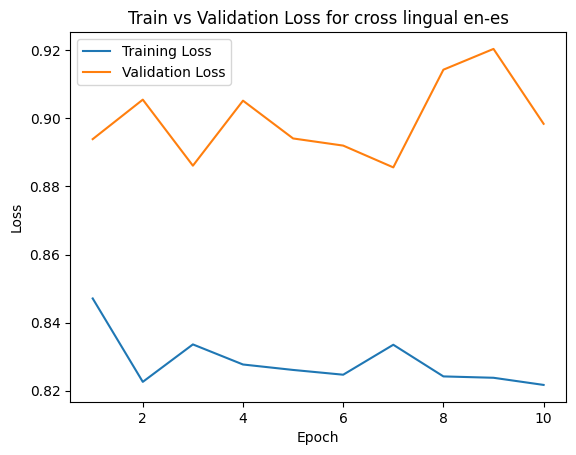

In [729]:
import matplotlib.pyplot as plt



# Define the data
epochs = range(1, 11)
#train_losses = train_loss
#val_losses = val_loss

# Plot the data
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss for cross lingual en-es')

# Add legend
plt.legend()

# Show the plot
plt.show()

<p> it appears that the training loss and validation loss are fluctuating and not decreasing consistently over the 10 epochs. This suggests that the model may not have converged to the optimal solution yet.</p>

In [730]:
import pickle
with open('../data/word_dict_en_v1.pickle', 'wb') as handle:
    pickle.dump(vocab_dict_en, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [731]:
with open('../data/word_dict_es_v1.pickle', 'wb') as handle:
    pickle.dump(vocab_dict_es, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [732]:
torch.save(model, "../data/cross_siamese_model_v1.pt")